<a href="https://colab.research.google.com/github/ManaswiniPattanaik898/MedicalInsuranceCostPrediction/blob/main/MedicalInsuranceCostPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Collecting Data, Data Preprocessing and Data Analysis


In [2]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

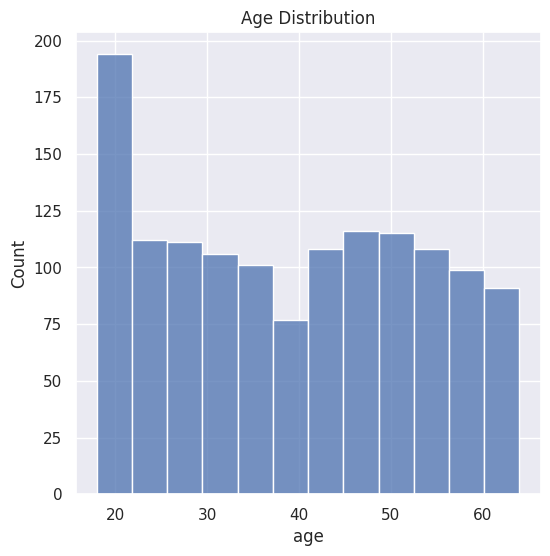

In [8]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

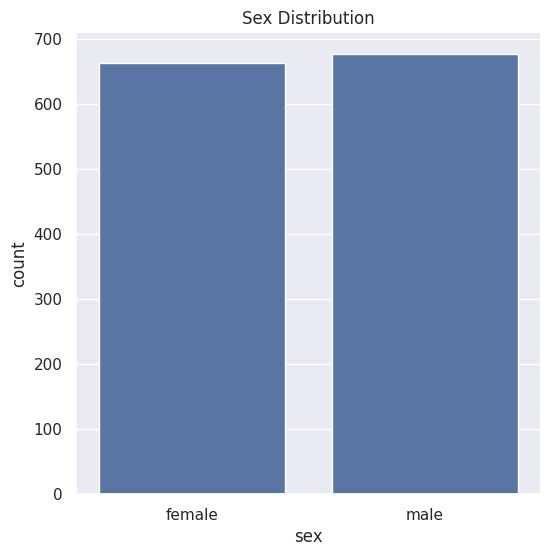

In [9]:
#distribution of gender
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


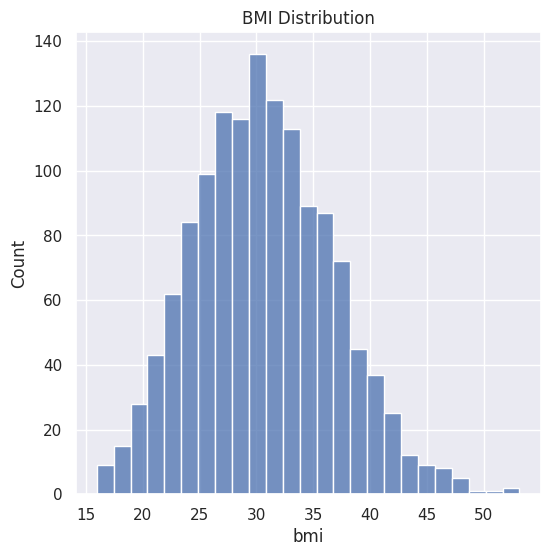

In [11]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()


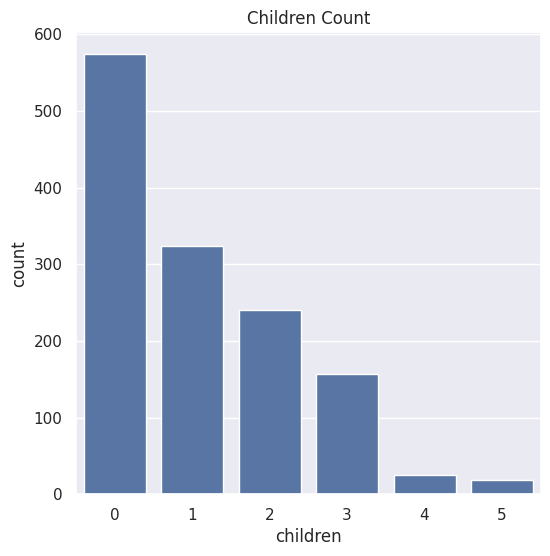

In [12]:
#children countplot
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children Count')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


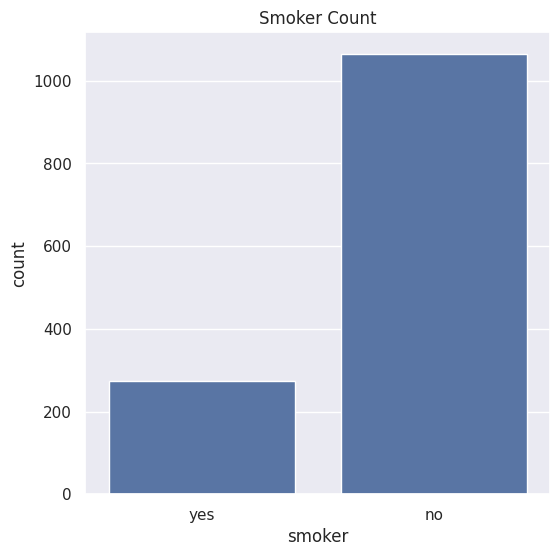

In [14]:
#smoker countplot
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker Count')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


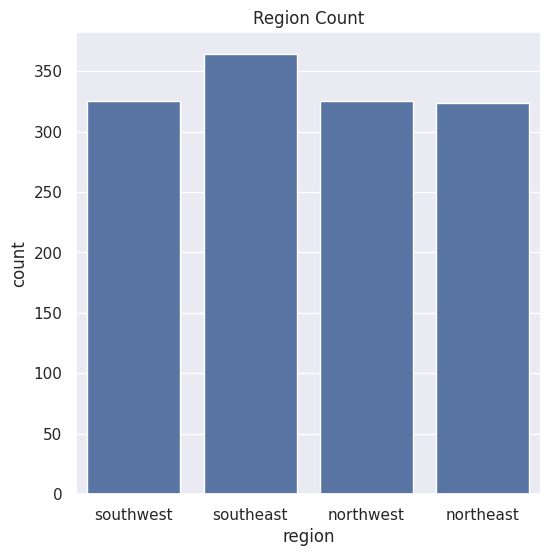

In [16]:
#Region countplot
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Count')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Text(0.5, 1.0, 'Charges Distribution')

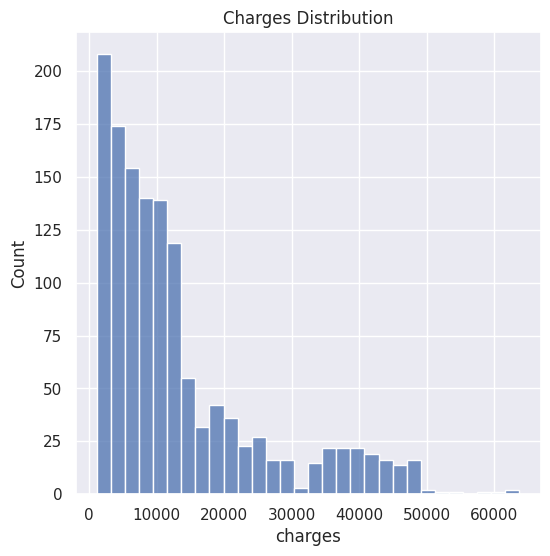

In [19]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')

Data Preprocessing

In [25]:
#Encoding the categorical features
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


Splitting Data into Features and Target

In [26]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [27]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting Data into Training and Testing Set

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [33]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [34]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [36]:
#Model Evaluation
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [37]:
#Prediction on Testing Data
test_data_prediction = regressor.predict(X_test)

In [38]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684076


Building a Predictive System

In [45]:
input_data = (31,1,25.74,0,1,0)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
